In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### From Chapter 1 of Twomey (1977)

$$ B(\lambda, T) = \alpha_{\lambda} B(\bar{\lambda}, T) + \beta_{\lambda} $$

In [2]:
from bt2rad import bt2rad
import numpy as np

In [3]:
T = np.arange(230,300,10)
B = bt2rad(675., T)            # 675 cm-1 is near the center for the 15-um CO2 band

Text(0, 0.5, 'Radiance')

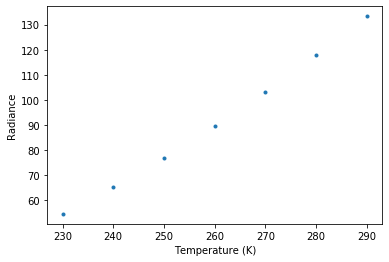

In [4]:
plot(T,B,'.')
xlabel('Temperature (K)')
ylabel('Radiance')

Text(0, 0.5, 'Radiance')

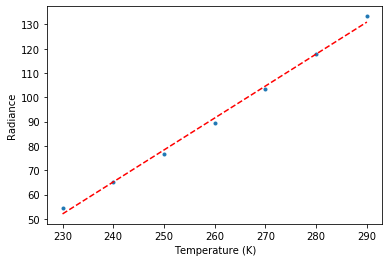

In [7]:
p = np.polyfit(T,B,1)
plot(T,B,'.', T,polyval(p,T),'r--')
xlabel('Temperature (K)')
ylabel('Radiance')

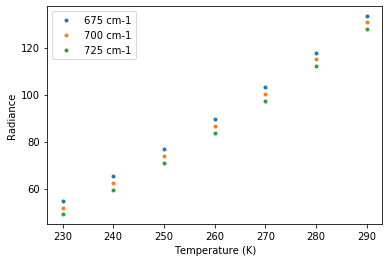

In [8]:
figure()
plot(T, bt2rad(675., T), '.', T, bt2rad(700., T), '.', T, bt2rad(725., T), '.')
xlabel('Temperature (K)')
ylabel('Radiance')
legend(('675 cm-1', '700 cm-1', '725 cm-1'), loc='best')

In [9]:
p1 = np.polyfit(T, bt2rad(675., T), 1)
p2 = np.polyfit(T, bt2rad(700., T), 1)
p3 = np.polyfit(T, bt2rad(725., T), 1)

In [10]:
[p1, p2, p3]

[array([   1.31488375, -250.3667531 ]),
 array([   1.31639086, -253.49107034]),
 array([   1.3123575 , -255.37736595])]

In [18]:
T = 280.
a = np.array([p1[0], p2[0], p3[0]])
b = np.array([p1[1], p2[1], p3[1]])

B = bt2rad(np.array([675., 700., 725.]), T) + randn(3,1)*0.5

np.linalg.inv(a*np.identity(3)) * (B - b)

array([[280.02353471,   0.        ,   0.        ],
       [  0.        , 279.95304433,   0.        ],
       [  0.        ,   0.        , 280.62054301]])